# Alchera Data Technologies Ltd

## Data Science Exercise


## Task
Using data from two M25 road sensors (given in CSVs) you are required to answer a series of questions and conduct a general investigation into the behaviour of data found at these two locations. Assume that the questions are posed by the road operator who wants to gain both knowledge and understanding of how the road is used; to improve road throughput and organise maintenance work etc. Bear in mind that this individual has no idea what the data looks like.

You are expected to answer these questions in the form of written text with graphs and statistics to back up any claims as well as providing intuition as to why you feel the behaviour is like this. Ensure that any work you do show is clear and understandable. This task is very open and you may tackle and present it as you see fit. If there are any patterns or specific points of interest that you would like to highlight you are free to do so. 
<br>

The two sensors are found fairly close to each other on the M25 Clockwise Junction 10 towards A3 southbound. One is located on a slip road and one is on the main road preceding the slip road:<br>
<br>
<dl>
  <dt>sensor_id road_type (lat, long)  </dt>
  <dd>- 49965 slip road (51.3205395250799, -0.446298174454472)</dd>
  <dd>- 48741 main road (51.3184047579063, -0.441290074916838)</dd>

<br>
    
<dl>
  <dt>The questions being posed are as follows:  </dt>
  <dd> 1) How many HGVs (Heavy Goods Vehicles) turn left onto the sliproad and how does their use of each lane vary throughout the day?</dd>
  <dd> 2) Do vehicle speeds vary from the slip road and the main road?</dd>
  <dd> 3) How does traffic flow vary for the two roads at 10pm for different days or perhaps the same day on different weeks?</dd>
  <dd> 4) Is the usage of the road lanes consistent at all times on the main road (e.g. does lane 1 always experience the most flows)? </dd>
  <dd> 5) What are typical flows between 10pm and 5am on the main road and what is the relationship between total flows and HGV flows (or HGV percentage)?</dd>
<br>    
<dl>
  <dt>Unit Definitions: </dt>
  <dd> - Average Speed: measured in km/h</dd>
  <dd> - Flow: flow rate of vehicles measured in number of vehicles per hour</dd>
  <dd> - Category 1: vehicles less than 5.2m in length</dd>
  <dd> - Category 2: vehicles between 5.2m and 6.6m in length</dd>
  <dd> - Category 3: vehicles between 6.6m and 11.6m in length</dd>
  <dd> - Category 4: vehicles more than 11.6m in length</dd>
  <dd> - Headway: average time in seconds between vehicles</dd>
  <dd> - Occupancy: percentage of time that the section of road is occupied by vehicles</dd>

    
### Starting Point    
```python
import pandas as pd
df_slip = pd.read_csv('./M25_49965_2020_test.csv') # slip road
df_main = pd.read_csv('./M25_48741_2020_test.csv') # main road
```

## Notes
- The code must be implemented in Python 3 and within this Jupyter Notebook.
- Do not share this exercise on Github, GitLab etc or you may be **disqualified from the recruitment process**.
- You may need to make some assumptions for this task, please clearly identify them in a list of assumptions.
- You may also incorporate data from other sources if necessary e.g. weather data or twitter data for identifying potentially anomalous behaviour such as accidents or roadworks.
- Make sure to add additional requirements to the `requirements.txt` file so we can run your notebook with the relevant python packages.
- If you have any questions don’t hesitate to contact us. 

load required packages

In [44]:
#import the required python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import __version__
from  plotly.offline import plot
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#print(__version__) # requires version >= 1.9.0
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

Load the dataset into pandas dataframe

In [14]:
#censor data obtained from the main road
main_road = pd.read_csv('M25_48741_2020_test.csv')## load the main road data
main_road =pd.DataFrame(main_road) ## covert main road data into DataFrame
#len(main_road.columns) # print total number of columns
#main_road.head() #check the head of the dataframe
#main_road.info() # main road information(finidng how many entries each column has)
#main_road.describe()#Generate descriptive statistics


In [15]:
#censor data obtained from the slip road
slip_road = pd.read_csv('M25_49965_2020_test.csv') # load the slip road data
slip_road =pd.DataFrame(slip_road) # covert slip road data into DataFrame
#len(slip_road.columns) # print total number of columns
#slip_road.head() #check the head of the dataframe
#slip_road.info() # slip road information(finidng how many entries each column has)
#slip_road.describe()#Generate descriptive statistics

In [16]:
main_road.head() #check the head of the dataframe

,Unnamed: 0,sensor_id,timestamp,flow_category_1,flow_category_2,flow_category_3,flow_category_4,flow_lane_1,flow_lane_2,flow_lane_3,...,occupancy_lane_5,occupancy_lane_6,occupancy_lane_7,headway_lane_1,headway_lane_2,headway_lane_3,headway_lane_4,headway_lane_5,headway_lane_6,headway_lane_7
0,0,48741,2021-01-25T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,25,0,0,NaN,NaN,NaN,NaN
1,1,48741,2021-01-24T23:59:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,25,0,0,NaN,NaN,NaN,NaN
2,2,48741,2021-01-24T23:58:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,25,0,0,NaN,NaN,NaN,NaN
3,3,48741,2021-01-24T23:57:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,25,0,0,NaN,NaN,NaN,NaN
4,4,48741,2021-01-24T23:56:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10,7,0,NaN,NaN,NaN,NaN


In [17]:
slip_road.head() #check the head of the dataframe

,Unnamed: 0,sensor_id,timestamp,flow_category_1,flow_category_2,flow_category_3,flow_category_4,flow_lane_1,flow_lane_2,flow_lane_3,...,occupancy_lane_5,occupancy_lane_6,occupancy_lane_7,headway_lane_1,headway_lane_2,headway_lane_3,headway_lane_4,headway_lane_5,headway_lane_6,headway_lane_7
0,0,49965,2021-01-25T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
1,1,49965,2021-01-24T23:59:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
2,2,49965,2021-01-24T23:58:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
3,3,49965,2021-01-24T23:57:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
4,4,49965,2021-01-24T23:56:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN


In [36]:
print('length of data collection on main road: ',main_road['timestamp'].max() - main_road['timestamp'].min()) #length of data collection on main road

length of data collection on main road:  366 days 00:00:00


In [37]:
print('length of data collection on slip road: ',slip_road['timestamp'].max() - slip_road['timestamp'].min()) #length of data collection on main road

length of data collection on slip road:  366 days 00:00:00


### clean up the timestamp column in main road by removing T and Z

In [18]:
##clean up the timestamp column in main road by removing T and Z
tim_avg=main_road['timestamp'].str.split('T', expand=True,) # remove the string 'T'
main_road.loc[:,['Year']]=tim_avg[0] # assign into date column in main_road
main_road.loc[:,['Time']]=tim_avg[1] # assign into time column in main_road
main_road['Time']=main_road['Time'].str.split('Z', expand=True,).drop(columns=[1]) #remove the string 'Z' in the time in main_road
main_road['timestamp']=main_road['Year'] + " " +  main_road['Time']
main_road=main_road.drop(columns=['Year','Time'])
main_road['timestamp'] = main_road['timestamp'].apply(pd.to_datetime)


In [21]:
main_road.head()#check the head of the dataframe

,Unnamed: 0,sensor_id,timestamp,flow_category_1,flow_category_2,flow_category_3,flow_category_4,flow_lane_1,flow_lane_2,flow_lane_3,...,occupancy_lane_5,occupancy_lane_6,occupancy_lane_7,headway_lane_1,headway_lane_2,headway_lane_3,headway_lane_4,headway_lane_5,headway_lane_6,headway_lane_7
0,0,48741,2021-01-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,25,0,0,NaN,NaN,NaN,NaN
1,1,48741,2021-01-24 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,25,0,0,NaN,NaN,NaN,NaN
2,2,48741,2021-01-24 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,25,0,0,NaN,NaN,NaN,NaN
3,3,48741,2021-01-24 23:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,25,0,0,NaN,NaN,NaN,NaN
4,4,48741,2021-01-24 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10,7,0,NaN,NaN,NaN,NaN


### clean up the timestamp column in slip road by removing T and Z

In [22]:
##clean up the timestamp column in slip road by removing T and Z
tim2_avg =slip_road['timestamp'].str.split('T', expand=True,)
slip_road.loc[:,['Year']]=tim2_avg[0] # assign into date column in slip_road
slip_road.loc[:,['Time']]=tim2_avg[1] # assign into time column in slip_road
slip_road['Time']=slip_road['Time'].str.split('Z', expand=True,).drop(columns=[1]) #remove the string 'Z' in the time in slip_road
slip_road['timestamp']=slip_road['Year'] + " " +  slip_road['Time']
slip_road=slip_road.drop(columns=['Year','Time'])
slip_road['timestamp'] = slip_road['timestamp'].apply(pd.to_datetime)

In [23]:
slip_road.head() #check the head of the dataframe

,Unnamed: 0,sensor_id,timestamp,flow_category_1,flow_category_2,flow_category_3,flow_category_4,flow_lane_1,flow_lane_2,flow_lane_3,...,occupancy_lane_5,occupancy_lane_6,occupancy_lane_7,headway_lane_1,headway_lane_2,headway_lane_3,headway_lane_4,headway_lane_5,headway_lane_6,headway_lane_7
0,0,49965,2021-01-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
1,1,49965,2021-01-24 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
2,2,49965,2021-01-24 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
3,3,49965,2021-01-24 23:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
4,4,49965,2021-01-24 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN


Drop columns that has no values in each dataset 

In [24]:
#using dataframe.max() to check for the max values and dataframe.min() for the min values within the column  
###identify if there is any missing value in the dataframes for both main road and slip road
#slip_road.isna().any()
#main_road.isna().any()
###replace any missing value in the dataframes
#slip_road['average_speed_lane_2'].fillna(value=int(0))

#dropping of empty columns from main_road
main_road = main_road.drop(columns=['flow_category_1', 'flow_category_2','flow_category_3',
                                    'flow_category_4','flow_lane_1','flow_lane_2','flow_lane_3',
                                    'flow_lane_4','flow_lane_5','flow_lane_6','flow_lane_7',
                                    'flow_category_1_lane_4', 'flow_category_1_lane_5','flow_category_1_lane_6',
                                    'flow_category_1_lane_7','flow_category_2_lane_4','flow_category_2_lane_5',
                                    'flow_category_2_lane_6','flow_category_2_lane_7','flow_category_3_lane_4',
                                    'flow_category_3_lane_5','flow_category_3_lane_6','flow_category_3_lane_7',
                                    'flow_category_4_lane_4','flow_category_4_lane_5','flow_category_4_lane_6',
                                    'flow_category_4_lane_7','average_speed_lane_4','average_speed_lane_5',
                                    'average_speed_lane_6','average_speed_lane_7','occupancy_lane_4',
                                    'occupancy_lane_5','occupancy_lane_6','occupancy_lane_7','headway_lane_4',
                                    'headway_lane_5','headway_lane_6','headway_lane_7'])


In [25]:
main_road.head()#check the head of the dataframe

,Unnamed: 0,sensor_id,timestamp,flow_category_1_lane_1,flow_category_1_lane_2,flow_category_1_lane_3,flow_category_2_lane_1,flow_category_2_lane_2,flow_category_2_lane_3,flow_category_3_lane_1,...,flow_category_4_lane_3,average_speed_lane_1,average_speed_lane_2,average_speed_lane_3,occupancy_lane_1,occupancy_lane_2,occupancy_lane_3,headway_lane_1,headway_lane_2,headway_lane_3
0,0,48741,2021-01-25 00:00:00,0,0,0,0,0,0,0,...,0,89.0,0.0,0.0,3,0,0,25,0,0
1,1,48741,2021-01-24 23:59:00,0,0,0,0,0,0,120,...,0,92.0,0.0,0.0,1,0,0,25,0,0
2,2,48741,2021-01-24 23:58:00,0,0,0,60,0,0,0,...,0,99.0,0.0,0.0,2,0,0,25,0,0
3,3,48741,2021-01-24 23:57:00,120,0,0,0,0,0,0,...,0,120.0,0.0,0.0,1,0,0,25,0,0
4,4,48741,2021-01-24 23:56:00,0,60,0,60,0,0,0,...,0,110.0,117.0,0.0,0,0,0,10,7,0


In [26]:
#dropping of empty columns from slip_road
slip_road = slip_road.drop(columns=['flow_category_1', 'flow_category_2','flow_category_3',
                                    'flow_category_4','flow_lane_1','flow_lane_2','flow_lane_3',
                                    'flow_lane_4','flow_lane_5','flow_lane_6','flow_lane_7',
                                    'flow_category_1_lane_4', 'flow_category_1_lane_5','flow_category_1_lane_6',
                                    'flow_category_1_lane_7','flow_category_2_lane_4','flow_category_2_lane_5',
                                    'flow_category_2_lane_6','flow_category_2_lane_7','flow_category_3_lane_4',
                                    'flow_category_3_lane_5','flow_category_3_lane_6','flow_category_3_lane_7',
                                    'flow_category_4_lane_4','flow_category_4_lane_5','flow_category_4_lane_6',
                                    'flow_category_4_lane_7','average_speed_lane_4','average_speed_lane_5',
                                    'average_speed_lane_6','average_speed_lane_7','occupancy_lane_4',
                                    'occupancy_lane_5','occupancy_lane_6','occupancy_lane_7','headway_lane_4',
                                    'headway_lane_5','headway_lane_6','headway_lane_7','flow_category_1_lane_3',
                                    'flow_category_2_lane_3','flow_category_3_lane_3','flow_category_4_lane_3',
                                    'average_speed_lane_3','occupancy_lane_3','headway_lane_3'])

In [27]:
slip_road.head()#check the head of the dataframe

,Unnamed: 0,sensor_id,timestamp,flow_category_1_lane_1,flow_category_1_lane_2,flow_category_2_lane_1,flow_category_2_lane_2,flow_category_3_lane_1,flow_category_3_lane_2,flow_category_4_lane_1,flow_category_4_lane_2,average_speed_lane_1,average_speed_lane_2,occupancy_lane_1,occupancy_lane_2,headway_lane_1,headway_lane_2
0,0,49965,2021-01-25 00:00:00,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
1,1,49965,2021-01-24 23:59:00,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
2,2,49965,2021-01-24 23:58:00,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
3,3,49965,2021-01-24 23:57:00,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
4,4,49965,2021-01-24 23:56:00,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0


# Question 1: How many HGVs (Heavy Goods Vehicles) turn left onto the sliproad and how does their use of each lane vary throughout the day?

HGVs are vehicles with a length more than 11.6m as reported by UK Department of Transport

In [116]:
#number of vehicles with category 4 both on main road and slip road
HGV_on_main_road= main_road[['timestamp','flow_category_4_lane_1','flow_category_4_lane_2','flow_category_4_lane_3']]
HGV_on_slip_road =slip_road[['timestamp','flow_category_4_lane_1','flow_category_4_lane_2']]

In [28]:
##check the head of the dataframe
HGV_on_main_road.head(5)

,timestamp,flow_category_4_lane_1,flow_category_4_lane_2,flow_category_4_lane_3
0,2021-01-25 00:00:00,120,0,0
1,2021-01-24 23:59:00,0,0,0
2,2021-01-24 23:58:00,60,0,0
3,2021-01-24 23:57:00,0,0,0
4,2021-01-24 23:56:00,0,0,0


In [29]:
##check the head of the dataframe
HGV_on_slip_road.head(5)

,timestamp,flow_category_4_lane_1,flow_category_4_lane_2
0,2021-01-25 00:00:00,0,0
1,2021-01-24 23:59:00,0,0
2,2021-01-24 23:58:00,0,0
3,2021-01-24 23:57:00,0,0
4,2021-01-24 23:56:00,0,0


In [38]:
##Total number of HGV vehicles that turns left onto the slip road
print("Total number of HGV vehicles that turns left onto the slip road for 366 days: ",HGV_on_slip_road['flow_category_4_lane_1'].sum() + HGV_on_slip_road['flow_category_4_lane_2'].sum())

Total number of HGV vehicles that turns left onto the slip road for 366 days:  12144720


In [39]:
##Total number of HGV vehicles on the main road
print("Total number of HGV vehicles on the main road for 366 days: ",HGV_on_main_road['flow_category_4_lane_1'].sum() + HGV_on_main_road['flow_category_4_lane_2'].sum() + HGV_on_main_road['flow_category_4_lane_3'].sum())

Total number of HGV vehicles on the main road for 366 days:  86166660


In [42]:
##Total number of HGV vehicles on the main road
main_HGV_r = HGV_on_main_road['flow_category_4_lane_1'].sum() + HGV_on_main_road['flow_category_4_lane_2'].sum() + HGV_on_main_road['flow_category_4_lane_3'].sum()
slip_HGV_r = HGV_on_slip_road['flow_category_4_lane_1'].sum() + HGV_on_slip_road['flow_category_4_lane_2'].sum()
print("Total number of HGV vehicles remaining on the main road after some tuned left onto the slip road for 366 days: ", main_HGV_r - slip_HGV_r)

Total number of HGV vehicles remaining on the main road after some tuned left onto the slip road for 366 days:  74021940


Plot graph showing the HGV Vechicles use of each lane on the Slip road

C:\Users\Tony\anaconda3\envs\data_sc\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:title={'center':'HGV Vechicles use of each lane on the Slip road for 24 hours of the day within 366 days'}, xlabel='timestamp', ylabel='Sum of HGV Vechicles on the slip road for the 366 days'>

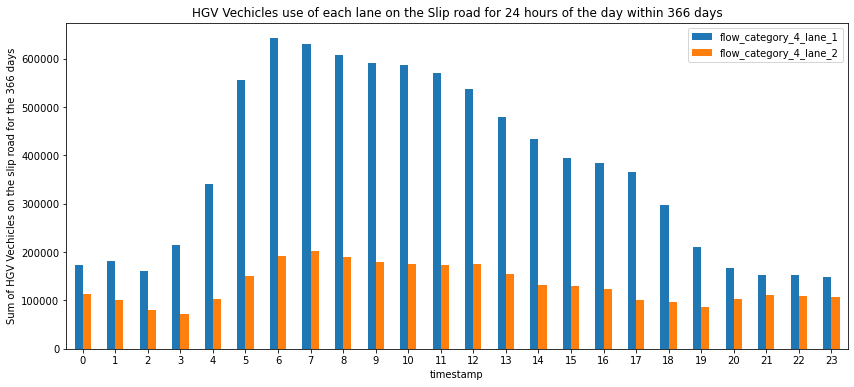

In [46]:
## Plot graph showing the HGV Vechicles use of each lane on the Slip road
fig, axs =plt.subplots(figsize=(14, 6))
plt.title('HGV Vechicles use of each lane on the Slip road for 24 hours of the day within 366 days')
plt.ylabel("Sum of HGV Vechicles on the slip road for the 366 days")
HGV_on_slip_road.groupby(HGV_on_slip_road['timestamp'].dt.hour)["flow_category_4_lane_1","flow_category_4_lane_2"].sum().plot(kind='bar',rot=0, ax=axs)

Plot graph showing the HGV Vechicles use of each lane on the main road

C:\Users\Tony\anaconda3\envs\data_sc\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:title={'center':'HGV Vechicles use of each lane on the main road for 24 hours of the day within 366 days'}, xlabel='timestamp', ylabel='Sum of HGV Vechicles on the main road for the 366 days'>

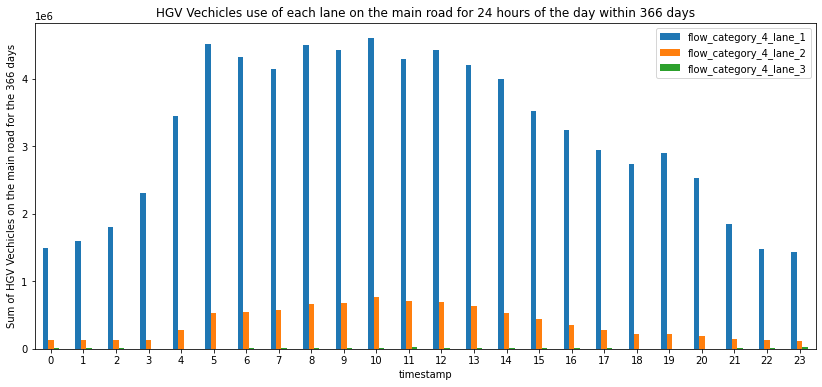

In [47]:
## Plot graph showing the HGV Vechicles use of each lane on the main road
fig, axs =plt.subplots(figsize=(14, 6))
plt.title("HGV Vechicles use of each lane on the main road for 24 hours of the day within 366 days")
plt.ylabel("Sum of HGV Vechicles on the main road for the 366 days")
HGV_on_main_road.groupby(HGV_on_main_road['timestamp'].dt.hour)["flow_category_4_lane_1","flow_category_4_lane_2","flow_category_4_lane_3"].sum().plot(kind='bar',rot=0, ax=axs)

# Note:
## The rest of the graphs presented in this investigation are interactive
## kindly click on them to compare roads and lanes

# Question 2: Do vehicle speeds vary from the slip road and the main road?

In [49]:
##convert average speed lane for main_road into dataframes
df_main_speed =main_road[["average_speed_lane_1","average_speed_lane_2","average_speed_lane_3"]]
df_main_speed = pd.DataFrame(df_main_speed)

df_main_speed['main_road_average_speed_lane_1']=main_road[["average_speed_lane_1"]]
df_main_speed['main_road_average_speed_lane_2']=main_road[["average_speed_lane_2"]]
df_main_speed['main_road_average_speed_lane_3']=main_road[["average_speed_lane_3"]]

df_main_speed=df_main_speed.drop(columns=["average_speed_lane_1","average_speed_lane_2","average_speed_lane_3"])

In [50]:
df_main_speed.head()

,main_road_average_speed_lane_1,main_road_average_speed_lane_2,main_road_average_speed_lane_3
0,89.0,0.0,0.0
1,92.0,0.0,0.0
2,99.0,0.0,0.0
3,120.0,0.0,0.0
4,110.0,117.0,0.0


In [51]:
####convert average speed lane for slip_road into dataframes
df_slip_speed =slip_road[["average_speed_lane_1","average_speed_lane_2"]]
df_slip_speed = pd.DataFrame(df_slip_speed)

df_slip_speed['slip_road_average_speed_lane_1']=slip_road[["average_speed_lane_1"]]
df_slip_speed['slip_road_average_speed_lane_2']=slip_road[["average_speed_lane_2"]]

df_slip_speed =df_slip_speed.drop(columns=["average_speed_lane_1","average_speed_lane_2"])

In [52]:
df_slip_speed.head()

,slip_road_average_speed_lane_1,slip_road_average_speed_lane_2
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


Plotted graph showing the mean of the Varying Speed on each lane between the Main road and Slip road

In [89]:
df_main_speed_mean=df_main_speed.groupby(main_road['timestamp'].dt.hour)["main_road_average_speed_lane_1","main_road_average_speed_lane_2","main_road_average_speed_lane_3"].mean()
df_main_speed_mean = pd.DataFrame(df_main_speed_mean)#convert main_speed_mean into dataframe

df_slip_speed_mean=df_slip_speed.groupby(slip_road['timestamp'].dt.hour)["slip_road_average_speed_lane_1","slip_road_average_speed_lane_2"].mean()
df_slip_speed_mean=pd.DataFrame(df_slip_speed_mean)#convert slip_speed_mean into dataframe

##merge the two dataframe
merge_main_slip_speed_mean = pd.merge(df_main_speed_mean, df_slip_speed_mean, on='timestamp')

##do vehicle speed varies from the slip road and main road
merge_main_slip_speed_mean.iplot(kind='bar',width=50.0,
                                 size=40,title="Mean of the Varying Speed on each lane of the Main road and Slip road",
                                 y=["main_road_average_speed_lane_1","main_road_average_speed_lane_2",
                                  "main_road_average_speed_lane_3","slip_road_average_speed_lane_1",
                                  "slip_road_average_speed_lane_2"],xTitle="timestamp", yTitle="average speed per lane")


C:\Users\Tony\anaconda3\envs\data_sc\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Tony\anaconda3\envs\data_sc\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Plotted graph showing the mean of the Varying Speed on each lane between the Main road and Slip road per days of week

In [141]:
df_main_speed_mean_per_dayofweek=df_main_speed.groupby(main_road['timestamp'].dt.dayofweek)["main_road_average_speed_lane_1","main_road_average_speed_lane_2","main_road_average_speed_lane_3"].mean().reset_index()
df_slip_speed_mean_per_dayofweek=df_slip_speed.groupby(slip_road['timestamp'].dt.dayofweek)["slip_road_average_speed_lane_1","slip_road_average_speed_lane_2"].mean().reset_index()

##merge the two dataframe
main_slip_speed_mean_per_dayofweek = pd.merge(df_main_speed_mean_per_dayofweek, df_slip_speed_mean_per_dayofweek, on='timestamp')
main_slip_speed_mean_per_dayofweek['timestamp']= ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']

##do vehicle speed varies from the slip road and main road
main_slip_speed_mean_per_dayofweek.iplot(kind="bar",
                                width=50.0,
                                size=40,
                                sortbars=True,title="Varying Speed on each lane of the both roads per days of week in 366 days",
                                keys =["main_road_average_speed_lane_1","main_road_average_speed_lane_2",
                                  "main_road_average_speed_lane_3","slip_road_average_speed_lane_1",
                                  "slip_road_average_speed_lane_2"],
                                x = ["timestamp"],xTitle="days of week", yTitle="average speed per lane",
                                theme="ggplot")


C:\Users\Tony\anaconda3\envs\data_sc\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Tony\anaconda3\envs\data_sc\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



# Question 3: How does traffic flow vary for the two roads at 10pm for different days or perhaps the same day on different weeks?

In [70]:
# filter by single day for the 366 days
filter_main_road_10pm = main_road[main_road['timestamp'].dt.strftime('%H') == '22'] #filter traffic for just 10pm on main road

filter_slip_road_10pm = slip_road[slip_road['timestamp'].dt.strftime('%H') == '22'] #filter traffic for just 10pm on slip road


In [72]:
filter_main_road_10pm.head()#check the head of the dataframe

,Unnamed: 0,sensor_id,timestamp,flow_category_1_lane_1,flow_category_1_lane_2,flow_category_1_lane_3,flow_category_2_lane_1,flow_category_2_lane_2,flow_category_2_lane_3,flow_category_3_lane_1,...,flow_category_4_lane_3,average_speed_lane_1,average_speed_lane_2,average_speed_lane_3,occupancy_lane_1,occupancy_lane_2,occupancy_lane_3,headway_lane_1,headway_lane_2,headway_lane_3
61,61,48741,2021-01-24 22:59:00,120,0,0,0,0,0,0,...,0,115.0,0.0,0.0,1,0,0,25,0,0
62,62,48741,2021-01-24 22:58:00,120,60,0,0,0,0,0,...,0,97.0,109.0,0.0,3,0,0,18,25,0
63,63,48741,2021-01-24 22:57:00,180,0,0,0,0,0,0,...,0,91.0,0.0,0.0,1,0,0,14,0,0
64,64,48741,2021-01-24 22:56:00,0,120,0,0,0,0,0,...,0,72.0,96.0,0.0,2,2,0,25,25,0
65,65,48741,2021-01-24 22:55:00,60,0,0,0,0,0,0,...,0,86.0,0.0,0.0,0,0,0,23,0,0


In [73]:
filter_slip_road_10pm.head()#check the head of the dataframe

,Unnamed: 0,sensor_id,timestamp,flow_category_1_lane_1,flow_category_1_lane_2,flow_category_2_lane_1,flow_category_2_lane_2,flow_category_3_lane_1,flow_category_3_lane_2,flow_category_4_lane_1,flow_category_4_lane_2,average_speed_lane_1,average_speed_lane_2,occupancy_lane_1,occupancy_lane_2,headway_lane_1,headway_lane_2
61,61,49965,2021-01-24 22:59:00,0,0,0,0,0,0,0,60,0,82.0,0,1,0,25
62,62,49965,2021-01-24 22:58:00,120,0,0,0,0,60,0,0,91,99.0,1,1,25,25
63,63,49965,2021-01-24 22:57:00,0,60,0,0,0,0,0,0,0,111.0,0,0,0,25
64,64,49965,2021-01-24 22:56:00,60,0,0,0,0,0,0,0,108,0.0,0,0,25,0
65,65,49965,2021-01-24 22:55:00,0,60,0,60,0,0,0,0,0,90.0,0,1,0,25


In [83]:
##filter mean for main_road by 10pm
filter_main_road_10pm_mean=filter_main_road_10pm.groupby(filter_main_road_10pm['timestamp'].dt.date)["flow_category_1_lane_1","flow_category_1_lane_2","flow_category_1_lane_3",
                                                                         "flow_category_2_lane_1","flow_category_2_lane_2","flow_category_2_lane_3",
                                                                         "flow_category_3_lane_1","flow_category_3_lane_2","flow_category_3_lane_3",
                                                                         "flow_category_4_lane_1","flow_category_4_lane_2","flow_category_4_lane_3"].mean().reset_index()

##filter mean for slip_road by 10pm
filter_slip_road_10pm_mean=filter_slip_road_10pm.groupby(filter_slip_road_10pm['timestamp'].dt.date)["flow_category_1_lane_1","flow_category_1_lane_2",
                                                                                                     "flow_category_2_lane_1","flow_category_2_lane_2",
                                                                                                     "flow_category_3_lane_1","flow_category_3_lane_2",
                                                                                                     "flow_category_4_lane_1","flow_category_4_lane_2"].mean().reset_index()

##merge the two dataframe
merge_main_slip_road_10pm_mean = pd.merge(filter_main_road_10pm_mean, filter_slip_road_10pm_mean, on='timestamp') ## combine the two dataframe


C:\Users\Tony\anaconda3\envs\data_sc\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Tony\anaconda3\envs\data_sc\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [81]:
filter_slip_road_10pm_mean.head()#check the head of the dataframe

,timestamp,flow_category_1_lane_1,flow_category_1_lane_2,flow_category_2_lane_1,flow_category_2_lane_2,flow_category_3_lane_1,flow_category_3_lane_2,flow_category_4_lane_1,flow_category_4_lane_2
0,2020-01-25,204.000000,88.00000,5.000000,9.000000,3.000000,5.000000,4.000000,4.000000
1,2020-01-26,205.000000,84.00000,7.000000,9.000000,2.000000,1.000000,6.000000,1.000000
2,2020-01-27,98.644068,95.59322,3.050847,9.152542,3.050847,3.050847,5.084746,10.169492
3,2020-01-28,76.000000,149.00000,3.000000,12.000000,0.000000,5.000000,5.000000,10.000000
4,2020-01-29,99.000000,129.00000,3.000000,9.000000,1.000000,7.000000,2.000000,10.000000


In [82]:
filter_slip_road_10pm_mean.head()#check the head of the dataframe

,timestamp,flow_category_1_lane_1,flow_category_1_lane_2,flow_category_2_lane_1,flow_category_2_lane_2,flow_category_3_lane_1,flow_category_3_lane_2,flow_category_4_lane_1,flow_category_4_lane_2
0,2020-01-25,204.000000,88.00000,5.000000,9.000000,3.000000,5.000000,4.000000,4.000000
1,2020-01-26,205.000000,84.00000,7.000000,9.000000,2.000000,1.000000,6.000000,1.000000
2,2020-01-27,98.644068,95.59322,3.050847,9.152542,3.050847,3.050847,5.084746,10.169492
3,2020-01-28,76.000000,149.00000,3.000000,12.000000,0.000000,5.000000,5.000000,10.000000
4,2020-01-29,99.000000,129.00000,3.000000,9.000000,1.000000,7.000000,2.000000,10.000000


In [84]:
merge_main_slip_road_10pm_mean.head()

,timestamp,flow_category_1_lane_1_x,flow_category_1_lane_2_x,flow_category_1_lane_3,flow_category_2_lane_1_x,flow_category_2_lane_2_x,flow_category_2_lane_3,flow_category_3_lane_1_x,flow_category_3_lane_2_x,flow_category_3_lane_3,...,flow_category_4_lane_2_x,flow_category_4_lane_3,flow_category_1_lane_1_y,flow_category_1_lane_2_y,flow_category_2_lane_1_y,flow_category_2_lane_2_y,flow_category_3_lane_1_y,flow_category_3_lane_2_y,flow_category_4_lane_1_y,flow_category_4_lane_2_y
0,2020-01-25,396.000000,401.000000,64.000000,20.000000,18.000000,7.000000,22.000000,4.00000,0.000000,...,1.000000,0.0,204.000000,88.00000,5.000000,9.000000,3.000000,5.000000,4.000000,4.000000
1,2020-01-26,411.000000,392.000000,64.000000,17.000000,25.000000,7.000000,26.000000,5.00000,0.000000,...,2.000000,0.0,205.000000,84.00000,7.000000,9.000000,2.000000,1.000000,6.000000,1.000000
2,2020-01-27,266.440678,266.440678,27.457627,25.423729,22.372881,2.033898,29.491525,12.20339,1.016949,...,16.271186,0.0,98.644068,95.59322,3.050847,9.152542,3.050847,3.050847,5.084746,10.169492
3,2020-01-28,234.000000,314.000000,60.000000,12.000000,29.000000,2.000000,33.000000,13.00000,2.000000,...,37.000000,0.0,76.000000,149.00000,3.000000,12.000000,0.000000,5.000000,5.000000,10.000000
4,2020-01-29,174.000000,341.000000,130.000000,14.000000,20.000000,2.000000,20.000000,17.00000,7.000000,...,35.000000,3.0,99.000000,129.00000,3.000000,9.000000,1.000000,7.000000,2.000000,10.000000


Plotted graph showing the mean of Traffic flow for different date within 366 days by 10pm

In [96]:
#Traffic flow for each day within 366 days by 10pm
##x=main_road y=slip_road
merge_main_slip_road_10pm_mean.iplot(x = ["timestamp"],xTitle="different days traffic",
                        yTitle="Mean of Traffic Flow by 10pm",
                        title="Mean of the Traffic flow for each day on the two roads within 366 days by 10pm(x=main_road y=slip_road)")




Plotted graph for the mean of traffic flow for days of the week by 10pm obtained from 53 weeks from 2020-01-01 to 2021-01-01


In [137]:
###dayofweek gives only the index(0-monday,1-tuesday,2-wednesday,3-thursday,4-friday,5-saturday,6-sunday)
mean_main_road_per_day = filter_main_road_10pm.groupby(filter_main_road_10pm['timestamp'].dt.dayofweek)["flow_category_1_lane_1","flow_category_1_lane_2","flow_category_1_lane_3",
                                                                         "flow_category_2_lane_1","flow_category_2_lane_2","flow_category_2_lane_3",
                                                                         "flow_category_3_lane_1","flow_category_3_lane_2","flow_category_3_lane_3",
                                                                         "flow_category_4_lane_1","flow_category_4_lane_2","flow_category_4_lane_3"].mean().reset_index()


mean_slip_road_per_day=filter_slip_road_10pm.groupby(filter_slip_road_10pm['timestamp'].dt.dayofweek)["flow_category_1_lane_1","flow_category_1_lane_2",
                                                                               "flow_category_2_lane_1","flow_category_2_lane_2",
                                                                               "flow_category_3_lane_1","flow_category_3_lane_2",
                                                                               "flow_category_4_lane_1","flow_category_4_lane_2"].mean().reset_index()

##merge the two dataframe
merge_main_slip_road_10pm_flow_per_day = pd.merge(mean_main_road_per_day, mean_slip_road_per_day, on='timestamp') ## combine the two dataframe
merge_main_slip_road_10pm_flow_per_day['timestamp']= ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']

###average of Traffic flow for each day of the week in 2020 to 2021 by 10pm
merge_main_slip_road_10pm_flow_per_day.iplot(kind="bar",
                                width=50.0,
                                size=40,
                                sortbars=True,
                                keys =['flow_category_1_lane_1_x',
                                       'flow_category_1_lane_2_x',
                                       'flow_category_1_lane_3', 'flow_category_2_lane_1_x',
                                       'flow_category_2_lane_2_x', 'flow_category_2_lane_3',
                                       'flow_category_3_lane_1_x', 'flow_category_3_lane_2_x',
                                       'flow_category_3_lane_3', 'flow_category_4_lane_1_x',
                                       'flow_category_4_lane_2_x', 'flow_category_4_lane_3',
                                       'flow_category_1_lane_1_y', 'flow_category_1_lane_2_y',
                                       'flow_category_2_lane_1_y', 'flow_category_2_lane_2_y',
                                       'flow_category_3_lane_1_y', 'flow_category_3_lane_2_y',
                                       'flow_category_4_lane_1_y', 'flow_category_4_lane_2_y'] ,
                                x = ["timestamp"],xTitle="Different days traffic for 53 weeks",
                                yTitle="Mean of Traffic Flow by 10pm",
                                title="Average of Traffic flow for days in 2020-01-01 to 2021-01-01 by 10pm (x=main_road y=slip_road)",
                                theme="ggplot")


C:\Users\Tony\anaconda3\envs\data_sc\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Tony\anaconda3\envs\data_sc\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Traffic flow within the two roads for every Sunday in each week between 2020-01-01 to 2021-01-01 by 10pm


Note: Change index values in the cell to filter for other days of the week
(0-monday,1-tuesday,2-wednesday,3-thursday,4-friday,5-saturday,6-sunday)

In [103]:
###Traffic flow within the two roads for every Sunday in each week between 2020 to 2021 by 10pm"

##flow for main road on sundays of week
sunday_main = filter_main_road_10pm['timestamp'].dt.dayofweek == 6 #6 represent sunday
Sunday_filter_main_road = filter_main_road_10pm[sunday_main]
Sunday_filter_main_road_mean=Sunday_filter_main_road.groupby(Sunday_filter_main_road['timestamp'].dt.date)["flow_category_1_lane_1","flow_category_1_lane_2","flow_category_1_lane_3",
                                                                         "flow_category_2_lane_1","flow_category_2_lane_2","flow_category_2_lane_3",
                                                                         "flow_category_3_lane_1","flow_category_3_lane_2","flow_category_3_lane_3",
                                                                         "flow_category_4_lane_1","flow_category_4_lane_2","flow_category_4_lane_3"].mean()
Sunday_filter_main_road_mean=pd.DataFrame(Sunday_filter_main_road_mean)
Sunday_filter_main_road_mean = Sunday_filter_main_road_mean.reset_index()

##flow for slip road on sundays of week
sunday_slip=filter_slip_road_10pm['timestamp'].dt.dayofweek == 6 #6 represent sunday
Sunday_filter_slip_road = filter_slip_road_10pm[sunday_slip]
Sunday_filter_slip_road_mean=Sunday_filter_slip_road.groupby(Sunday_filter_slip_road['timestamp'].dt.date)["flow_category_1_lane_1","flow_category_1_lane_2",
                                                          "flow_category_2_lane_1","flow_category_2_lane_2",
                                                          "flow_category_3_lane_1","flow_category_3_lane_2",
                                                          "flow_category_4_lane_1","flow_category_4_lane_2"].mean()
Sunday_filter_slip_road_mean=pd.DataFrame(Sunday_filter_slip_road_mean)
Sunday_filter_slip_road_mean = Sunday_filter_slip_road_mean.reset_index()


##merge the two dataframe
merge_Sunday_per_week_road = pd.merge(Sunday_filter_main_road_mean, Sunday_filter_slip_road_mean, on='timestamp') ## combine the two dataframe

merge_Sunday_per_week_road.iplot(x = ["timestamp"],xTitle="Sundays of each week",
                        yTitle="Mean of Traffic Flow for each sunday of the week by 10pm",
                        title="line graph on the Traffic flow within the two roads for every Sunday in each week between 2020-01-01 to 2021-01-01 by 10pm(x=main_road y=slip_road)")##x=main_road y=slip_road
merge_Sunday_per_week_road.iplot(kind="bar",
                                width=50.0,
                                size=40,
                                sortbars=True,
                                keys =['flow_category_1_lane_1_x',
                                       'flow_category_1_lane_2_x',
                                       'flow_category_1_lane_3', 'flow_category_2_lane_1_x',
                                       'flow_category_2_lane_2_x', 'flow_category_2_lane_3',
                                       'flow_category_3_lane_1_x', 'flow_category_3_lane_2_x',
                                       'flow_category_3_lane_3', 'flow_category_4_lane_1_x',
                                       'flow_category_4_lane_2_x', 'flow_category_4_lane_3',
                                       'flow_category_1_lane_1_y', 'flow_category_1_lane_2_y',
                                       'flow_category_2_lane_1_y', 'flow_category_2_lane_2_y',
                                       'flow_category_3_lane_1_y', 'flow_category_3_lane_2_y',
                                       'flow_category_4_lane_1_y', 'flow_category_4_lane_2_y'] ,
                                x = ["timestamp"],xTitle="every Sunday in each week between 2020 to 2021",
                                yTitle="Mean of Traffic Flow for each sunday of the week by 10pm",
                                title="Bar chat on the Traffic flow within the two roads for every Sunday in each week between 2020 to 2021 by 10pm(x=main_road y=slip_road)",
                                theme="ggplot")


C:\Users\Tony\anaconda3\envs\data_sc\lib\site-packages\ipykernel_launcher.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Tony\anaconda3\envs\data_sc\lib\site-packages\ipykernel_launcher.py:19: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



# Question 4: Is the usage of the road lanes consistent at all times on the main road (e.g. does lane 1 always experience the most flows)?


Usage of lanes on the main road by the percentage of time that section of the road is occupied by vehicles

In [104]:
## usage of lanes on the main road
usage_lane=main_road.groupby(main_road['timestamp'].dt.hour)['occupancy_lane_1',
                                                  'occupancy_lane_2',
                                                  'occupancy_lane_3'].mean().reset_index()#avearage for each days the roads are occupied
usage_lane.iplot(x = ["timestamp"],xTitle="usage of lanes per hour",
                        yTitle="Mean of lane occupancy",
                        title="Line graph showing the occupancy of lanes on the main road for 366 days")
usage_lane.iplot(kind="bar",
                                width=50.0,
                                size=40,
                                sortbars=True,
                                keys =['occupancy_lane_1',
                                                  'occupancy_lane_2',
                                                  'occupancy_lane_3'] ,
                                x = ["timestamp"],xTitle="usage of lanes per hour",
                        yTitle="Mean of lane occupancy",
                        title="Bar chat showing the occupancy of lanes on the main road for 366 days",
                                theme="ggplot")


C:\Users\Tony\anaconda3\envs\data_sc\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Usage of lanes on the main road by the flow rate for each categories of vehicles

In [147]:
#Usage of lanes on the main road by the flow rate for each categories of vehicles
usage_per_flow=main_road.groupby(main_road['timestamp'].dt.hour)["flow_category_1_lane_1","flow_category_1_lane_2","flow_category_1_lane_3",
                                                                         "flow_category_2_lane_1","flow_category_2_lane_2","flow_category_2_lane_3",
                                                                         "flow_category_3_lane_1","flow_category_3_lane_2","flow_category_3_lane_3",
                                                                         "flow_category_4_lane_1","flow_category_4_lane_2","flow_category_4_lane_3"].mean().reset_index()



usage_per_flow.iplot(x = ["timestamp"],xTitle="Vehicle flow on lanes per hour",
                        yTitle="Mean of Vehicle flow ",
                        title="Line graph showing the flow of vehicles on each lanes for the main road for 366 days")
usage_per_flow.iplot(kind="bar",
                                width=50.0,
                                size=40,
                                sortbars=True,
                                keys =["flow_category_1_lane_1","flow_category_1_lane_2","flow_category_1_lane_3",
                                       "flow_category_2_lane_1","flow_category_2_lane_2","flow_category_2_lane_3",
                                       "flow_category_3_lane_1","flow_category_3_lane_2","flow_category_3_lane_3",
                                       "flow_category_4_lane_1","flow_category_4_lane_2","flow_category_4_lane_3"] ,
                                x = ["timestamp"],xTitle="Vehicle flow on lanes per hour",
                        yTitle="Mean of Vehicle flow ",
                        title="Bar chat showing the flow of vehicles on each lanes for the main road for 366 days",
                                theme="ggplot")

C:\Users\Tony\anaconda3\envs\data_sc\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



# Questions 5: What are typical flows between 10pm and 5am on the main road and what is the relationship between total flows and HGV flows (or HGV percentage)?

In [186]:
Typ_flow_btw_10_5

,timestamp,flow_category_1_lane_1,flow_category_1_lane_2,flow_category_1_lane_3,flow_category_2_lane_1,flow_category_2_lane_2,flow_category_2_lane_3,flow_category_3_lane_1,flow_category_3_lane_2,flow_category_3_lane_3,flow_category_4_lane_1,flow_category_4_lane_2,flow_category_4_lane_3


In [197]:
#flow_btw_10_5=main_road[(main_road['timestamp'].dt.strftime('%H') >= '22') & (main_road['timestamp'].dt.strftime('%H') <= '5')] ##flow between 10pm and 5a.m

###flow between 10pm and 5a.m
flow_btw_10_11=main_road[(main_road['timestamp']).dt.strftime('%H:%M:%S').between('22:00:00','23:00:00')] #between 10p.m to 11p.m
flow_btw_0_5=main_road[(main_road['timestamp']).dt.strftime('%H:%M:%S').between('00:00:00','05:00:00')]#between 12 midnight to 5a.m

#flow between 10pm and 5a.m
flow_btw_10_5=[flow_btw_10_11,flow_btw_0_5]
flow_btw_10_5=pd.concat(flow_btw_10_5)


Typ_flow_btw_10_5 = flow_btw_10_5.groupby(flow_btw_10_5['timestamp'].dt.hour)["flow_category_1_lane_1","flow_category_1_lane_2","flow_category_1_lane_3",
                          "flow_category_2_lane_1","flow_category_2_lane_2","flow_category_2_lane_3",
                          "flow_category_3_lane_1","flow_category_3_lane_2","flow_category_3_lane_3",
                          'flow_category_4_lane_1','flow_category_4_lane_2','flow_category_4_lane_3'].mean().reset_index()

Typ_flow_btw_10_5.iplot(kind="bar",
                                width=50.0,
                                size=40,
                                sortbars=True,
                                keys =["flow_category_1_lane_1","flow_category_1_lane_2","flow_category_1_lane_3",
                                       "flow_category_2_lane_1","flow_category_2_lane_2","flow_category_2_lane_3",
                                       "flow_category_3_lane_1","flow_category_3_lane_2","flow_category_3_lane_3",
                                       "flow_category_4_lane_1","flow_category_4_lane_2","flow_category_4_lane_3"] ,
                                x = ["timestamp"],xTitle="vehicles flow on the main road lanes between 10p.m and 5a.m",
                        yTitle="Mean of vehicles flow  ",
                        title="Bar chat showing the flow of vehicles on each lanes for the main road for 366 days",
                                theme="ggplot")

C:\Users\Tony\anaconda3\envs\data_sc\lib\site-packages\ipykernel_launcher.py:15: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [198]:
#total flow columns
Total_flow_rela = flow_btw_10_5[["flow_category_1_lane_1","flow_category_1_lane_2","flow_category_1_lane_3",
                          "flow_category_2_lane_1","flow_category_2_lane_2","flow_category_2_lane_3",
                          "flow_category_3_lane_1","flow_category_3_lane_2","flow_category_3_lane_3",
                          'flow_category_4_lane_1','flow_category_4_lane_2','flow_category_4_lane_3']]

In [203]:
##correlation of the total flow and the HGV flows
colrr=Total_flow_rela.corr(method='pearson')
colrr.iplot(kind="heatmap",colorscale="Blues",dimensions=(700,700),title="Heatmap showing the relationship between total flows and HGV flows")